# 데이터 전처리

## 1. 데이터 탐색

In [ ]:
# 기본 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")

* 데이터 프레임 살펴보기

In [ ]:
# 상위 몇개 데이터 보기
df.head()
# 데이터 프레임 정보 보기(데이터 타입, 카운팅 갯수등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 변수 타입 변환

In [ ]:
# 변수 타입 변환 : .astype()
# Survived 열을 문자열로 변환
df['Survived'] = df['Survived'].astype(str)

# 정수형 : int64
# 실수형 : float64
# 불형 : bool

* 데이터 탐색

In [ ]:
# head, info, describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 기초 데이터 분석

In [ ]:
# Pclass(등급) 변수 분석 : groupby()
grouped = df.groupby('Pclass')
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

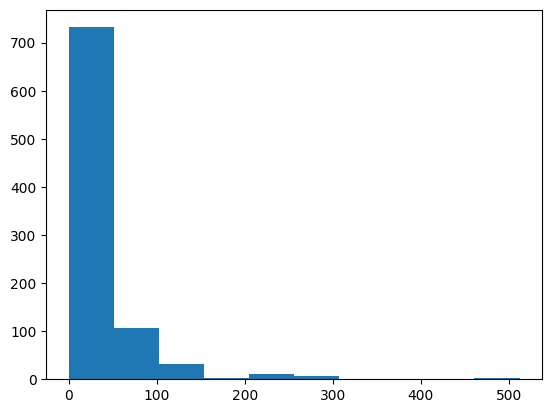

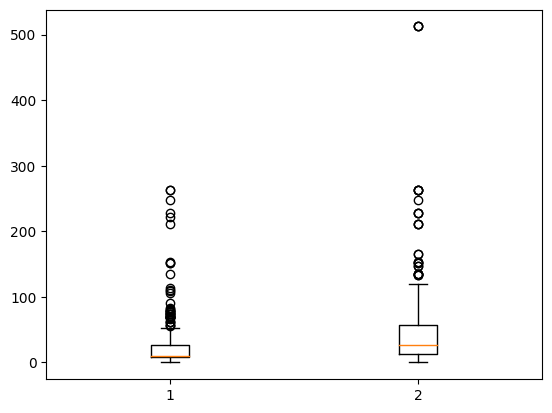

In [ ]:
# 사망자와 생존자간의 Fare(요금) 분석
# 전체 분포
plt.hist(df['Fare'])

# 생존자와 사망자 분리
data_0 = df[df['Survived'] == 0]['Fare']
data_1 = df[df['Survived'] == 1]['Fare']

fig,ax = plt.subplots()
ax.boxplot([data_0,data_1])
plt.show()

# 이상치 확인

In [ ]:
# 남성과 여성간의 생존 분석
grouped_sex = df.groupby('Sex')
print(grouped_sex.size())

data_f = df[df['Sex'] == 'female']['Survived']
data_f_new = pd.DataFrame(data_f).groupby('Survived')
print(data_f_new.size())

Sex
female    314
male      577
dtype: int64
Survived
0     81
1    233
dtype: int64


### 2. 데이터 전처리 개요

* 표준정규화

           한국인        일본인
0    59.642731  30.421728
1    45.645851  31.420839
2    54.967106  34.232981
3    58.418082  35.705010
4    59.900395  31.703786
..         ...        ...
995  45.340164  36.362060
996  51.031201  29.011083
997  53.377318  36.384120
998  50.754579  37.437226
999  53.287567  37.044430

[1000 rows x 2 columns]


(array([[  0.,   0.,   0.,   3.,  49., 208., 363., 276.,  89.,  12.],
        [ 33., 226., 460., 241.,  37.,   3.,   0.,   0.,   0.,   0.]]),
 array([20.34159873, 25.32445276, 30.30730679, 35.29016082, 40.27301484,
        45.25586887, 50.2387229 , 55.22157693, 60.20443096, 65.18728499,
        70.17013901]),
 <a list of 2 BarContainer objects>)

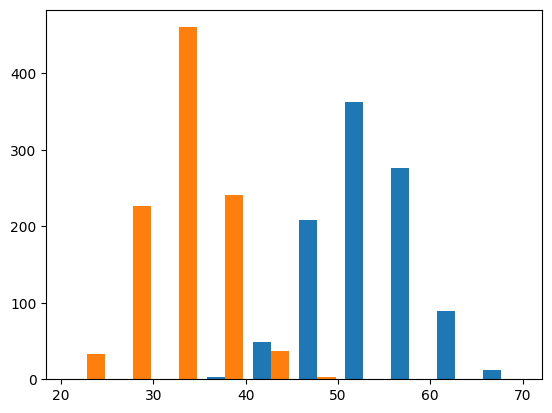

In [ ]:
# 육류 소비량 데이터 생성
# 한국인 1000명, 평균 : 53.9, 표준편차 : 5
# 일본인 1000명 평균 : 32.7 표준편차 : 4
meat_con_korean = 5 * np.random.randn(1000) + 53.9
meat_con_japan = 4 * np.random.randn(1000) + 32.7

# 데이터 프레임 생성
meat = pd.DataFrame({'한국인' : meat_con_korean, '일본인' : meat_con_japan})
print(meat)
plt.hist(meat)

* Z-표준화

In [ ]:
# 방법 1 : scipy.stats의 zscore()함수 활용
import scipy.stats as stats

meat['한국인_정규화']=stats.zscore(meat['한국인'])
meat['일본인_정규화']=stats.zscore(meat['일본인'])

meat.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,46.498611,36.790175,-1.473883,0.982283
1,49.399501,32.544208,-0.889163,-0.054778
2,62.514457,29.827007,1.754367,-0.718443
3,44.677911,38.719238,-1.840875,1.453450
4,49.026161,33.328668,-0.964415,0.136824


In [ ]:
# 방법 2 : 표준정규화 식을 직접 입력
meat['한국인_정규화_직접'] = (meat['한국인'] - np.mean(meat['한국인'])) / np.std(meat['한국인'])
meat['일본인_정규화_직접'] = (meat['일본인'] - np.mean(meat['일본인'])) / np.std(meat['일본인'])

meat.head()


,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화_직접,일본인_정규화_직접
0,46.498611,36.790175,-1.473883,0.982283,-1.473883,0.982283
1,49.399501,32.544208,-0.889163,-0.054778,-0.889163,-0.054778
2,62.514457,29.827007,1.754367,-0.718443,1.754367,-0.718443
3,44.677911,38.719238,-1.840875,1.453450,-1.840875,1.453450
4,49.026161,33.328668,-0.964415,0.136824,-0.964415,0.136824


In [ ]:
# 방법 3 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 중괄호 두번인 것 기억
meat['한국인_정규화_사이킷런'] = scaler.fit_transform(meat[['한국인']])
meat['일본인_정규화_사이킷런'] = scaler.fit_transform(meat[['일본인']])

meat.head()

,한국인,일본인,한국인_정규화_사이킷런,일본인_정규화_사이킷런
0,59.642731,30.421728,1.167450,-0.612353
1,45.645851,31.420839,-1.593799,-0.367768
2,54.967106,34.232981,0.245061,0.320649
3,58.418082,35.705010,0.925856,0.681004
4,59.900395,31.703786,1.218281,-0.298503


* MIN-MAX 정규화

In [ ]:
# 사이킷런 MinMaxScaler() 사용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

meat['한국인_mm_사이킷런'] = scaler.fit_transform(meat[['한국인']])
meat['일본인_mm_사이킷런'] = scaler.fit_transform(meat[['일본인']])

meat.head()

,한국인,일본인,한국인_정규화_사이킷런,일본인_정규화_사이킷런,한국인_mm_사이킷런,일본인_mm_사이킷런
0,59.642731,30.421728,1.167450,-0.612353,0.680776,0.368682
1,45.645851,31.420839,-1.593799,-0.367768,0.256347,0.405224
2,54.967106,34.232981,0.245061,0.320649,0.538997,0.508079
3,58.418082,35.705010,0.925856,0.681004,0.643641,0.561918
4,59.900395,31.703786,1.218281,-0.298503,0.688589,0.415573


In [ ]:
# 직접 수동으로 정규화

min_korea = np.min(meat['한국인'])
min_japan = np.min(meat['일본인'])

max_korea = np.max(meat['한국인'])
max_japan = np.max(meat['일본인'])

meat['한국인_mm_수동'] = (meat['한국인'] - min_korea) / (max_korea - min_korea)
meat['일본인_mm_수동'] = (meat['일본인'] - min_japan) / (max_japan - min_japan)

meat.head()

,한국인,일본인,한국인_정규화_사이킷런,일본인_정규화_사이킷런,한국인_mm_사이킷런,일본인_mm_사이킷런,한국인_mm_수동,일본인_mm_수동
0,59.642731,30.421728,1.167450,-0.612353,0.680776,0.368682,0.680776,0.368682
1,45.645851,31.420839,-1.593799,-0.367768,0.256347,0.405224,0.256347,0.405224
2,54.967106,34.232981,0.245061,0.320649,0.538997,0.508079,0.538997,0.508079
3,58.418082,35.705010,0.925856,0.681004,0.643641,0.561918,0.643641,0.561918
4,59.900395,31.703786,1.218281,-0.298503,0.688589,0.415573,0.688589,0.415573


#### 정규분포 변환
* 왜도 계산은 scipy.stats 의 .skew()함수 사용
* 왜도가 양수면 왼쪽으로 치우친 그래프
  * sqrt(x), log(x) or log10(x), 1/x
* 왜도가 음수면 오른쪽으로 치우친 그래프
  * sqrt(max(x+1)-x), log(max(x+1)-x) or log10(max(x+1-x)), 1 / (max(x+1)-x)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv')
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [ ]:
# CONT와 PHYS의 왜도 계산
import scipy.stats as stats
print(stats.skew(df['CONT']))
print(stats.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [ ]:
# 두개 다 로그변환실시
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS']+1) - df['PHYS'])

print(stats.skew(df['CONT1']))
print(stats.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


#### 범주화, 이산형화
* 연속형 변수를 이산형으로 작업하는 과정
* if문을 통한 수동작업
* pandas의 cut() 함수 사용
* pandas의 qcut() 함수 사용



In [ ]:
# 학생 이름과 수학 점수 데이터 생성
data = {
    '학생이름': ['학생1', '학생2', '학생3', '학생4', '학생5'],
    '수학점수': [85, 90, 78, 92, 88]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)

  학생이름  수학점수
0  학생1    85
1  학생2    90
2  학생3    78
3  학생4    92
4  학생5    88


In [ ]:
# 방법 1 : 수동으로 지정(조건문)

df['등급'] = 0

df.loc[(df['수학점수'] < 60), "등급"] = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70), "등급"] = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80), "등급"] = 'C'
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90), "등급"] = 'B'
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] < 100), "등급"] = 'A'

df.head()

# 또는 함수
def grade(score) :
  if score >= 90 :
    return 'A'
  elif score >= 80 :
    return 'B'
  elif score >= 70 :
    return 'C'
  elif score >= 60 :
    return 'D'
  else:
    return 'F'

df.head()



,학생이름,수학점수,등급
0,학생1,85,B
1,학생2,90,A
2,학생3,78,C
3,학생4,92,A
4,학생5,88,B


In [ ]:
# 방법2 : cut()함수 사용
# pd.cut(x = 데이터, bins=[경계값리스트], labels=[구간마다 줄 라벨 이름]. include_lowest=True)
# include_lowest는 가장 낮은 경계값에 =을 붙인다고 생각하면 됨.

df['등급_cut'] = pd.cut(x = df['수학점수'],
                      bins = [0, 60, 70, 80, 90,100],
                      labels = ['F', 'D', 'C', 'B', 'A'],
                      include_lowest=True)
df.head()


,학생이름,수학점수,등급,등급_cut
0,학생1,85,B,B
1,학생2,90,A,B
2,학생3,78,C,C
3,학생4,92,A,A
4,학생5,88,B,B


In [ ]:
# 방법 3 : qcut 사용
# qcut은 bins를 지정해주는 것이 아니라 각각의 범주 별로 같은 데이터 개수가 나오게 자동으로 해줌.
# A 2명 B2명 C 2명..
# pd.qcut(x=데이터, q=구간숫자, labels = [라벨목록])

df['등급_qcut'] = pd.qcut(x = df['수학점수'], q=5, labels = ['F','D','C','B','A'])
df.head()

,학생이름,수학점수,등급,등급_cut,등급_qcut
0,학생1,85,B,B,D
1,학생2,90,A,B,B
2,학생3,78,C,C,F
3,학생4,92,A,A,A
4,학생5,88,B,B,C


#### 차원축소(PCA)
* pca 이전에는 필수적으로 정규화를 시켜줘야함.
* pca = PCA(n_components = n)
* n은 변환할 차원의 수
* 각 변수의 설명력이 나온다.
* 기여도 확인
print(pca.explained_variance_ratio_)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

iris = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 범주형 변수와 연속형 변수 분리
df = iris.drop(['species'], axis = 1)
df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 정규화 하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['sepal_length'] = scaler.fit_transform(df[['sepal_length']])
df['sepal_width'] = scaler.fit_transform(df[['sepal_width']])
df['petal_length'] = scaler.fit_transform(df[['petal_length']])
df['petal_width'] = scaler.fit_transform(df[['petal_width']])

df.head()
df.shape

(150, 4)

In [ ]:
# 주성분 분석 하기
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
p_score = pca.fit_transform(df)
print(p_score.shape)
#  기여도 확인
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


#### 결측치 처리
* 결측치 식별
* 결측치 대체

In [ ]:
df = pd.DataFrame()
x = [14, 15, 13, 14 ,None, None, 19, 11, 12, 18]
df['토론'] = x


In [ ]:
# info() : 컬럼별 결측치 개수 확인 가능
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   토론      8 non-null      float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [ ]:
# isnull() : 결측치면 True 아니면 False 를 반환
# notnull() : 데이터가 있으면 True 결측치면 False를 반환

df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# isnull 을 활용하여 열마다 결측치 갯수 확인
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 결측치 대체
* 단순 대치법
  * 완전 분석법
  * 평균대치법
  * 단순확률 대치법
* 다중 대치법


In [ ]:
# 결측치가 있는 모든 행 삭제
df_1 = df.dropna(axis = 0)
print(df_1.isnull().sum().sum())
df_1.shape

0


(183, 12)

In [ ]:
# 결측치를 지정값으로 대체
# Age 변수 내 결측값을 Age의 평균으로 대체
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 결측치를 최빈값으로 대체
# Embarked 변수를 최빈값으로대체
# scipy.stats 의 mode 함수 사용
from scipy.stats import mode
em_mode = df['Embarked'].mode()
df['Embarked'].fillna(em_mode[0], inplace=True)
# 이 때 em_mode를 보면 데이터프레임의 형태로 되어있어서 슬라이스를 해줌
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# 결측치를 인접치로 대체
df['Embarked'].fillna(method = 'ffill', inplace =True)

In [ ]:
# 결측치를 그룹의 평균값으로 대체
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv")

In [ ]:
# groupby 함수로 그룹별 Age 평균 구하기
print(df.groupby('Sex')['Age'].mean())
print(df.groupby('Pclass')['Age'].mean())


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


#### 이상치 처리
* 이상치란?
  * 3분위수 + 1.5 * IQR 초과의 값
  * 1분위수 - 1.5 * IQR 초과의 값


In [3]:
import pandas as pd
import numpy as np

data = 10*np.random.randn(200) + 50
df = pd.DataFrame({'값' : data})

# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

In [16]:
# 사분위 수 및 IQR 구하기
Q1 = df['값'].describe()["25%"] # 1분위수
Q2 = df['값'].describe()["50%"] # 2분위수
Q3 = df['값'].describe()["75%"]

IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

# 검출하기
upcondition = df['값'] > upper
lowcondition = df['값'] < lower

upoutlier = df[upcondition]
lowoutlier = df[lowcondition]

print(upoutlier)
print(lowoutlier)

              값
45    77.344752
202  100.000000
204  110.000000
        값
201   2.0
203  10.0


#### 평활화
* 단순이동평균
* 지수가중이동평균

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/lynx.csv')

df.head()

,Unnamed: 0,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475


In [21]:
# 단순이동평균
df['sma'] = df['value'].rolling(10).mean()

# 지수가중이동평균
df['ewm']  = df['value'].ewm(10).mean()

df.head()

,Unnamed: 0,time,value,sma,ewm
0,1,1821,269,NaN,269.000000
1,2,1822,321,NaN,296.238095
2,3,1823,585,NaN,401.797583
3,4,1824,871,NaN,536.360914
4,5,1825,1475,NaN,761.461483
